<a href="https://colab.research.google.com/github/Harshanand7/quant_assignment/blob/main/assignment_22b1249.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this notebook I have successfully completed the assignment with both the methods


1.   Implementation without using class method
2.   Implementation with class method



In [71]:
!pip install bayesian-optimization

In [72]:
!pip install gdown

In [73]:
import pandas as pd
import numpy as np
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [74]:

# below is the file id of the asset_1.csv file which I had uploaded to my google drive
file_id = '1Nz5YcQ9rRbGqeOAXgvZn2YLumEdJHTOc'

# constructing the download URL
url = f'https://drive.google.com/uc?id={file_id}'

# specifying the output file name
data = 'asset_1.csv'

# downloading the  file from Google Drive
gdown.download(url, data, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Nz5YcQ9rRbGqeOAXgvZn2YLumEdJHTOc
To: /content/asset_1.csv
100%|██████████| 259k/259k [00:00<00:00, 64.8MB/s]


'asset_1.csv'

##Task 1: Static Thresholds
Build a trading strategy based on static thresholds for building and liquidating a position.

In [75]:
data=pd.read_csv(data)
data.head()

,serial_num,price,alpha
0,0,18105.300781,0.000000
1,1,18398.960605,-0.630291
2,2,18204.939538,-0.123420
3,3,18339.357782,-0.240239
4,4,18578.084798,-0.612625


In [93]:
#checking the max and min value
column=data['alpha']
print(column.min())
print(column.max())

-2.0
2.0


In [94]:
# checking the row of min value of alpha
dx = data[data['alpha'] == -2.0]
dx

,serial_num,price,alpha
5015,5015,8584.698919,-2.0


In [95]:
# checking the row of max value of alpha
df = data[data['alpha'] == 2.0]
df

,serial_num,price,alpha
2722,2722,10327.449456,2.0


In [79]:
def apply_strategy(data, build_threshold, liquidate_threshold):
    positions = []
    current_position = 0
    for alpha in data['alpha']:
        if alpha > build_threshold :
            current_position = 1  # Buy
        elif alpha < -build_threshold:
            current_position = -1  # Sell
        elif abs(alpha) < liquidate_threshold:
            current_position = 0  # Liquidate
        positions.append(current_position)
    data['position'] = positions
    return data


##Task 2: Backtesting Engine
Build an engine that can generate the P&L statement basis your trading strategy file.

In [80]:

def run_backtest(data, build_threshold, liquidate_threshold):
    data_with_positions = apply_strategy(data.copy(), build_threshold, liquidate_threshold)
    pnl = calculate_pnl(data_with_positions)
    return pnl, data_with_positions

def calculate_pnl(data):
    data['price_change'] = data['price'].diff()
    data['pnl'] = data['position'].shift(1) * data['price_change']
    total_pnl = data['pnl'].sum()
    return total_pnl


##Task 3: Optimizing Thresholds
Find optimal thresholds for your alpha, maximising PnL for the given data.

In [81]:
def optimize_thresholds(data):
    def optimize_pnl(build_threshold, liquidate_threshold):
        pnl, _ = run_backtest(data, build_threshold, liquidate_threshold)
        return pnl

    pbounds = {'build_threshold': (0, 2), 'liquidate_threshold': (0, 2)}
    optimizer = BayesianOptimization(
        f=optimize_pnl,
        pbounds=pbounds,
        random_state=1,
    )
    optimizer.maximize(
        init_points=20,
        n_iter=200,
    )

    best_thresholds = optimizer.max['params'] # Best found parameters
    best_pnl = optimizer.max['target'] # Best found P&L
    return best_thresholds, best_pnl


## Code for plots

In [82]:

def plot_pnl_vs_thresholds_contour(results):
    df_results = pd.DataFrame(results)

    plt.figure(figsize=(14, 7))
    pivot_table = df_results.pivot(index="build_threshold", columns="liquidate_threshold", values="pnl")
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title("P&L vs. Thresholds")
    plt.xlabel("Build Threshold")
    plt.ylabel("Liquidate Threshold")
    plt.show()

    plt.figure(figsize=(14, 7))
    X, Y = np.meshgrid(pivot_table.columns, pivot_table.index)
    Z = pivot_table.values
    plt.contourf(X, Y, Z, cmap='viridis')
    plt.colorbar()
    plt.xlabel('Liquidate Threshold')
    plt.ylabel('Build Threshold')
    plt.title('Contour plot of P&L vs. Thresholds')
    plt.show()


## The optimised values of thresholds to maximise the P&L values are


1.   Build Threshold :- 0.456068161
2.   Build Threshold :- 0.184492745


3.   BEST P&L = 40145.92901



In [83]:
# optimizing thresholds
best_thresholds, best_pnl = optimize_thresholds(data)
print(f'Best Thresholds: {best_thresholds}, Best PnL: {best_pnl}')

|   iter    |  target   | build_... | liquid... |
-------------------------------------------------
| 1         | 1.633e+04 | 0.834     | 1.441     |
| 2         | 3.587e+04 | 0.0002287 | 0.6047    |
| 3         | 2.878e+04 | 0.2935    | 0.1847    |
| 4         | 2.208e+04 | 0.3725    | 0.6911    |
| 5         | 1.834e+04 | 0.7935    | 1.078     |
| 6         | 1.713e+04 | 0.8384    | 1.37      |
| 7         | 1.99e+04  | 0.4089    | 1.756     |
| 8         | 3.315e+04 | 0.05478   | 1.341     |
| 9         | 1.66e+04  | 0.8346    | 1.117     |
| 10        | 2.172e+04 | 0.2808    | 0.3962    |
| 11        | 55.54     | 1.601     | 1.937     |
| 12        | 2.103e+04 | 0.6268    | 1.385     |
| 13        | 359.9     | 1.753     | 1.789     |
| 14        | 3.046e+04 | 0.1701    | 0.07811   |
| 15        | 2.139e+04 | 0.3397    | 1.756     |
| 16        | 2.757e+04 | 0.1967    | 0.8422    |
| 17        | 536.8     | 1.916     | 1.066     |
| 18        | 3.366e+03 | 1.384     | 0.631     |


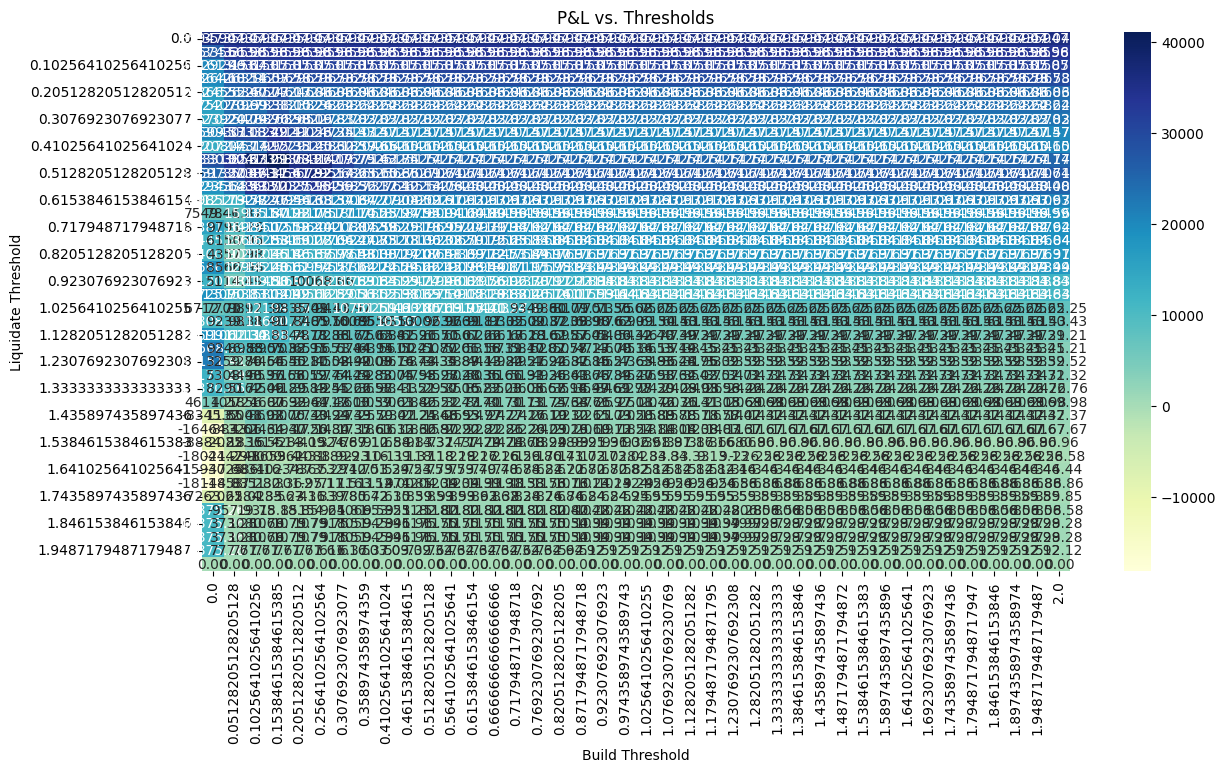

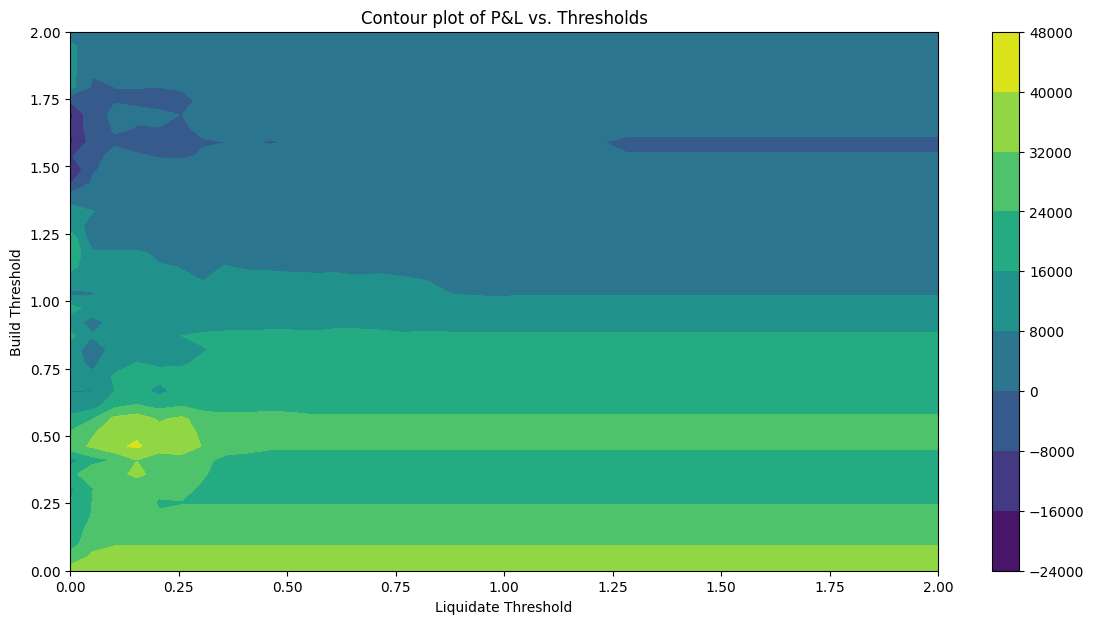

In [84]:
plot_pnl_vs_thresholds_contour(results)

## Applying the CLASS based method for strategy and backtesting engine

In [90]:
#Task-1
class TradingStrategy:
    def __init__(self, build_threshold=0.9, liquidate_threshold=0.1):
        self.build_threshold = build_threshold
        self.liquidate_threshold = liquidate_threshold

    def apply_strategy(self, data):
        positions = []
        current_position = 0
        for alpha in data['alpha']:
            if alpha > self.build_threshold:
                current_position = 1
            elif alpha < -self.build_threshold:
                current_position = -1
            elif abs(alpha) < self.liquidate_threshold:
                current_position = 0
            positions.append(current_position)
        data['position'] = positions
        return data

In [91]:
#Task-2
class BacktestEngine:
    def __init__(self, strategy):
        self.strategy = strategy

    def calculate_pnl(self, data):
        data['price_change'] = data['price'].diff()
        data['pnl'] = data['position'].shift(1) * data['price_change']
        total_pnl = data['pnl'].sum()
        return total_pnl

    def run_backtest(self, data):
        data_with_positions = self.strategy.apply_strategy(data.copy())
        pnl = self.calculate_pnl(data_with_positions)
        return pnl, data_with_positions

In [92]:
#Task-3
def optimize_thresholds(data, strategy_class):
    def optimize_pnl(build_threshold, liquidate_threshold):
        strategy = strategy_class(build_threshold, liquidate_threshold)
        backtest_engine = BacktestEngine(strategy)
        pnl, _ = backtest_engine.run_backtest(data)
        return pnl

    pbounds = {'build_threshold': (0, 2), 'liquidate_threshold': (0, 2)}
    optimizer = BayesianOptimization(
        f=optimize_pnl,
        pbounds=pbounds,
        random_state=1,
    )
    optimizer.maximize(
        init_points=20,
        n_iter=200,
    )

    best_thresholds = optimizer.max['params']
    best_pnl = optimizer.max['target']
    return best_thresholds, best_pnl


In [88]:
def plot_pnl_vs_thresholds_contour(results):
    df_results = pd.DataFrame(results)

    plt.figure(figsize=(14, 7))
    pivot_table = df_results.pivot(index="build_threshold", columns="liquidate_threshold", values="pnl")
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title("P&L vs. Thresholds")
    plt.xlabel("Build Threshold")
    plt.ylabel("Liquidate Threshold")
    plt.show()

    plt.figure(figsize=(14, 7))
    X, Y = np.meshgrid(pivot_table.columns, pivot_table.index)
    Z = pivot_table.values
    plt.contourf(X, Y, Z, cmap='viridis')
    plt.colorbar()
    plt.xlabel('Liquidate Threshold')
    plt.ylabel('Build Threshold')
    plt.title('Contour plot of P&L vs. Thresholds')
    plt.show()


## The optimised values of thresholds to maximise the P&L values are


1.   Build Threshold :- 0.456068161
2.   Build Threshold :- 0.184492745


3.   BEST P&L = 40145.92901



In [89]:
# optimizing thresholds
strategy_class = TradingStrategy
best_thresholds, best_pnl = optimize_thresholds(data, strategy_class)
print(f'Best Thresholds: {best_thresholds}, Best PnL: {best_pnl}')

|   iter    |  target   | build_... | liquid... |
-------------------------------------------------
| 1         | 1.633e+04 | 0.834     | 1.441     |
| 2         | 3.587e+04 | 0.0002287 | 0.6047    |
| 3         | 2.878e+04 | 0.2935    | 0.1847    |
| 4         | 2.208e+04 | 0.3725    | 0.6911    |
| 5         | 1.834e+04 | 0.7935    | 1.078     |
| 6         | 1.713e+04 | 0.8384    | 1.37      |
| 7         | 1.99e+04  | 0.4089    | 1.756     |
| 8         | 3.315e+04 | 0.05478   | 1.341     |
| 9         | 1.66e+04  | 0.8346    | 1.117     |
| 10        | 2.172e+04 | 0.2808    | 0.3962    |
| 11        | 55.54     | 1.601     | 1.937     |
| 12        | 2.103e+04 | 0.6268    | 1.385     |
| 13        | 359.9     | 1.753     | 1.789     |
| 14        | 3.046e+04 | 0.1701    | 0.07811   |
| 15        | 2.139e+04 | 0.3397    | 1.756     |
| 16        | 2.757e+04 | 0.1967    | 0.8422    |
| 17        | 536.8     | 1.916     | 1.066     |
| 18        | 3.366e+03 | 1.384     | 0.631     |


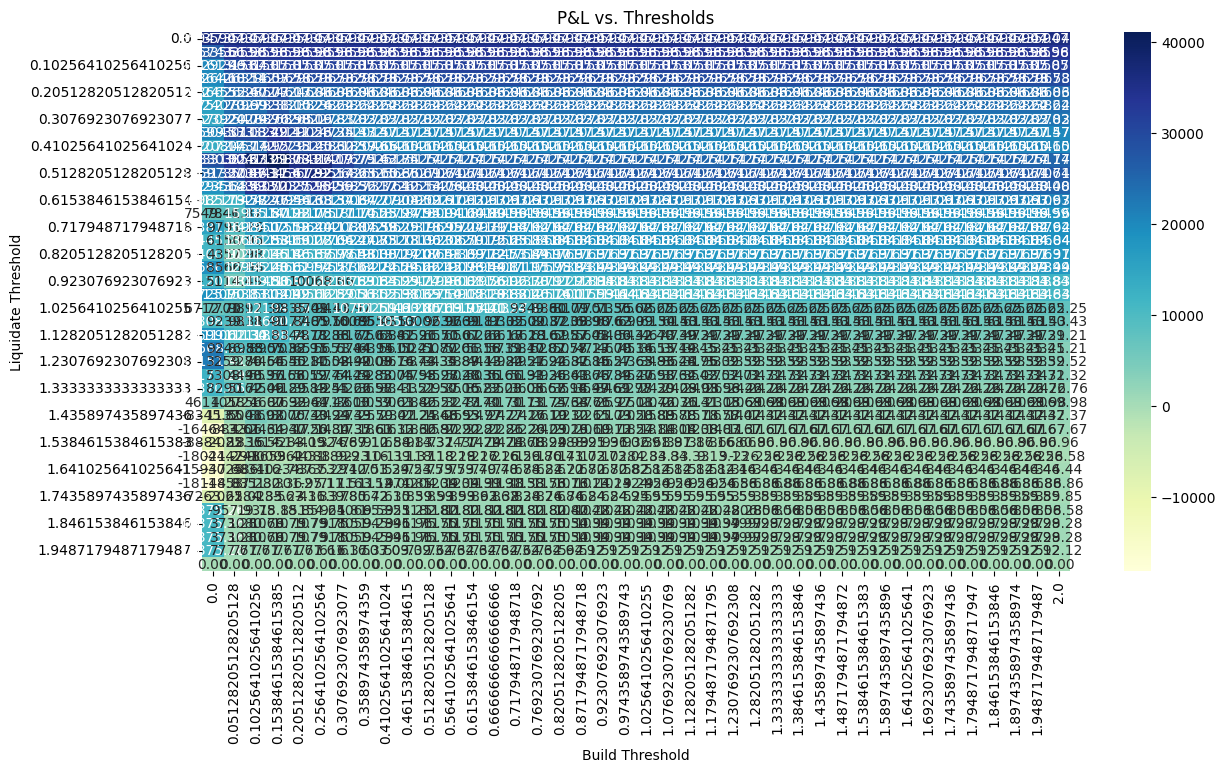

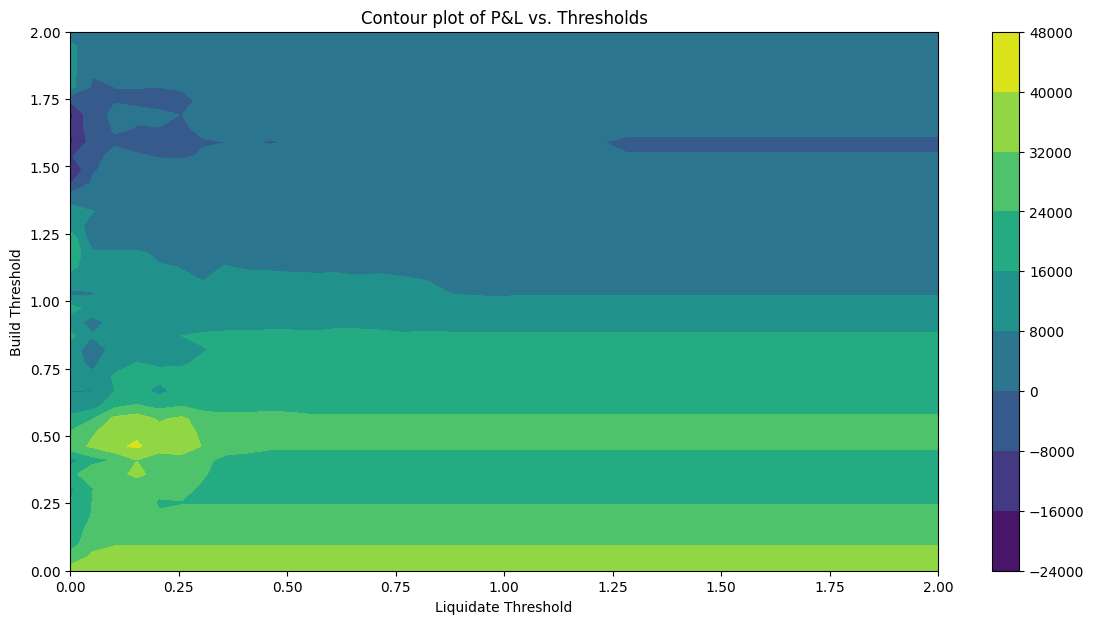

In [96]:
plot_pnl_vs_thresholds_contour(results)